# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [127]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[90, 52, 29, ..., 35, 91, 88],
       [16, 79, 11, ...,  6, 11, 45],
       [74, 68,  3, ..., 94, 28, 12],
       ...,
       [91, 98, 10, ..., 12, 86, 41],
       [39, 85, 17, ..., 64, 45, 95],
       [51, 81, 80, ..., 51, 18, 56]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [128]:
B = np.transpose(np.random.permutation(np.transpose(A)))
B

array([[78, 29, 62, ..., 77, 29, 14],
       [14, 37, 49, ..., 25, 11, 29],
       [13, 84, 64, ..., 91,  3, 26],
       ...,
       [36, 80, 20, ..., 95, 10, 81],
       [48, 71, 16, ..., 12, 17, 97],
       [ 0, 77, 71, ..., 96, 80, 30]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [129]:
C = A[A[:,::2].sum(axis=1) > A[:,1::2].sum(axis=1).mean()]
C

array([[45, 69, 24, ..., 90,  6, 48],
       [ 9, 69, 22, ...,  6, 17, 55],
       [50, 52, 54, ..., 42, 64, 21],
       ...,
       [ 9,  5, 70, ..., 44, 27, 64],
       [91, 98, 10, ..., 12, 86, 41],
       [39, 85, 17, ..., 64, 45, 95]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [130]:
i = np.argmax(np.max(A, axis=1) - np.min(A, axis=1))
i

3

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [131]:
D = np.argsort(A.reshape(1, len(A)*len(A[0]))).reshape(len(A),len(A[0])) + 1
D

array([[6718, 2149,  736, ...,  513, 4086, 6557],
       [2177, 4649, 2092, ..., 1203, 7334, 5369],
       [6209, 7077, 5363, ..., 8583, 9741, 9942],
       ...,
       [1060, 6496, 9216, ...,  198, 3255, 7285],
       [8852, 9313, 2458, ..., 3772,  334, 8528],
       [1669, 8219, 6512, ..., 1043, 1293, 3977]])

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массив, в каждой строке которого максимальный элемент равен $1$, минимальный - $0$. 

In [132]:
A_min = np.tile(A.min(axis=1).reshape((A.shape[0], 1)), (1, A.shape[1]))
A_max = np.tile(A.max(axis=1).reshape((A.shape[0], 1)), (1, A.shape[1]))
E = (A-A_min)/(A_max - A_min)
E

array([[0.97826087, 0.56521739, 0.31521739, ..., 0.38043478, 0.98913043,
        0.95652174],
       [0.14736842, 0.81052632, 0.09473684, ..., 0.04210526, 0.09473684,
        0.45263158],
       [0.7628866 , 0.70103093, 0.03092784, ..., 0.96907216, 0.28865979,
        0.12371134],
       ...,
       [0.92708333, 1.        , 0.08333333, ..., 0.10416667, 0.875     ,
        0.40625   ],
       [0.39393939, 0.85858586, 0.17171717, ..., 0.64646465, 0.45454545,
        0.95959596],
       [0.53125   , 0.84375   , 0.83333333, ..., 0.53125   , 0.1875    ,
        0.58333333]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [133]:
c = np.arange(1, 11).reshape((-1, 1, 1))   # shape: (10, 1, 1)
A * c   # shape: (200, 50) * (10, 1, 1) = (1, 200, 50) * (10, 1, 1) = (10, 200, 50)

array([[[ 90,  52,  29, ...,  35,  91,  88],
        [ 16,  79,  11, ...,   6,  11,  45],
        [ 74,  68,   3, ...,  94,  28,  12],
        ...,
        [ 91,  98,  10, ...,  12,  86,  41],
        [ 39,  85,  17, ...,  64,  45,  95],
        [ 51,  81,  80, ...,  51,  18,  56]],

       [[180, 104,  58, ...,  70, 182, 176],
        [ 32, 158,  22, ...,  12,  22,  90],
        [148, 136,   6, ..., 188,  56,  24],
        ...,
        [182, 196,  20, ...,  24, 172,  82],
        [ 78, 170,  34, ..., 128,  90, 190],
        [102, 162, 160, ..., 102,  36, 112]],

       [[270, 156,  87, ..., 105, 273, 264],
        [ 48, 237,  33, ...,  18,  33, 135],
        [222, 204,   9, ..., 282,  84,  36],
        ...,
        [273, 294,  30, ...,  36, 258, 123],
        [117, 255,  51, ..., 192, 135, 285],
        [153, 243, 240, ..., 153,  54, 168]],

       ...,

       [[720, 416, 232, ..., 280, 728, 704],
        [128, 632,  88, ...,  48,  88, 360],
        [592, 544,  24, ..., 752, 224,  96

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [134]:
a1 = A[:,1::2]
a1
a2 = A[:,0::2]
F = np.concatenate((a2, a1), axis=1)
F

array([[90, 29, 12, ..., 39, 35, 88],
       [16, 11, 28, ..., 67,  6, 45],
       [74,  3, 90, ..., 66, 94, 12],
       ...,
       [91, 10, 90, ..., 82, 12, 41],
       [39, 17,  0, ...,  9, 64, 95],
       [51, 80,  9, ..., 23, 51, 56]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [135]:
len(A[np.all(A > 5, axis=1)])

7

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [136]:
np.mean(np.split(A, 10), axis=0)

array([[37.9, 41.5, 60. , 44.3, 44.3, 45.3, 58.3, 63.3, 58.2, 47.7, 44.3,
        50.1, 49.5, 35.2, 40.5, 51.4, 63.9, 44.8, 38.4, 53.4, 69.8, 50. ,
        55.2, 57.4, 55. , 59. , 48.9, 49.7, 59.4, 53.5, 48.4, 60.2, 37.9,
        49.4, 55.5, 47.3, 53.2, 38.8, 55. , 38. , 55.8, 55.6, 59.9, 55.1,
        57.8, 53.4, 54. , 37.6, 63.8, 47.8],
       [38.8, 47.1, 51.2, 45.2, 24. , 49.8, 65.2, 59.2, 52.7, 66.3, 42.5,
        38.3, 65.8, 63.5, 40.1, 46.9, 59.4, 40.4, 40.8, 49.7, 56.3, 55.3,
        38.9, 51.6, 49.2, 49.8, 29.8, 61.5, 57.4, 56.1, 42.1, 44.7, 48.2,
        43.8, 45.6, 42.4, 52.7, 49.9, 31.6, 41.8, 43.4, 60.1, 39.2, 49.4,
        56.7, 33.4, 59. , 55.3, 50. , 57.1],
       [61.9, 51.4, 57.5, 26.5, 51.6, 47.1, 43.4, 31.5, 48.2, 40.3, 37.8,
        62.1, 52.5, 57.6, 48.8, 49.2, 58.8, 53.6, 56.1, 42.5, 48.1, 40.9,
        50.1, 45.1, 47.4, 50.7, 50.9, 48.5, 55.4, 42.5, 68.5, 46.8, 44.2,
        32.6, 54.4, 53.8, 49. , 43.1, 30.5, 51.6, 32.9, 59.8, 54.1, 59.6,
        30.1, 62.2, 58

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [137]:
_, ind = np.unique(A, return_index=True)
J = A.reshape((1, len(A) * len(A[0])))
J[0][np.sort(ind)]  

array([90, 52, 29, 60, 12,  4, 71, 62, 80, 91, 65, 56, 48, 70, 39, 28, 34,
        0, 33, 14, 92, 69, 78, 20, 77, 11, 87, 41,  9, 40, 35, 25, 53, 22,
       38, 61, 88, 16, 79, 37, 45, 97, 81, 96, 49, 63, 18, 89, 76, 21, 47,
       95, 17, 10,  2, 58, 84, 43, 26, 36, 67,  6, 74, 68,  3, 46, 32, 15,
       27, 93, 94, 64, 50, 13, 86, 85,  1, 72, 82, 66, 55, 83, 59, 19, 54,
        5, 99, 24, 57, 75,  8, 98, 73, 31, 30, 23,  7, 44, 42, 51])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [138]:
np.linalg.norm(A - np.mean(A, axis=0), axis=1)

array([188.35273465, 223.81734216, 240.59399961, 210.48442377,
       211.22339513, 220.71085757, 201.20738717, 219.53077837,
       182.84890661, 214.11285027, 200.08498857, 219.9775276 ,
       196.75782742, 222.04119584, 200.31455926, 197.28642287,
       190.33636712, 224.09034484, 206.94937219, 182.87687839,
       184.33803907, 234.51535696, 216.80740912, 170.87317709,
       200.0817899 , 187.17225395, 192.61329822, 183.45733196,
       188.64334775, 177.25073385, 207.20907955, 221.13530394,
       216.36261842, 199.25880821, 204.0746497 , 202.46573204,
       204.40543694, 187.81286604, 202.69144691, 202.0988685 ,
       208.90306999, 226.99306741, 218.58207303, 187.31992059,
       180.25601973, 215.07536505, 206.2263384 , 207.84037781,
       189.21512268, 214.19739179, 204.32210514, 202.06457545,
       213.41818725, 183.91139891, 199.71004644, 191.51888327,
       202.184823  , 206.72109871, 188.03955076, 210.60173943,
       198.49632906, 207.00693865, 213.41600842, 198.05

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [139]:
np.where(A < 50, 2 * A, 3 * A)

array([[270, 156,  58, ...,  70, 273, 264],
       [ 32, 237,  22, ...,  12,  22,  90],
       [222, 204,   6, ..., 282,  56,  24],
       ...,
       [273, 294,  20, ...,  24, 258,  82],
       [ 78, 255,  34, ..., 192,  90, 285],
       [153, 243, 240, ..., 153,  36, 168]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [140]:
def moving_average(arr: np.ndarray, window_size: int) -> np.ndarray:
    return np.convolve(arr[0], np.ones(window_size) / window_size, mode='valid') 
    
V = A.reshape((1, len(A) * len(A[0])))
V3 = moving_average(V, 3)
V5 = moving_average(V, 5)
V10 = moving_average(V, 10)

V5 = np.concatenate((V5,  np.zeros(V3.shape[0] - V5.shape[0])))
V10 = np.concatenate((V10,  np.zeros(V3.shape[0] - V10.shape[0])))
V3 + V5 + V10

array([160.7       , 131.        , 119.16666667, ...,  60.13333333,
        26.66666667,  41.66666667])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

Optimization terminated successfully.
         Current function value: -4.882074
         Iterations: 6
         Function evaluations: 16
         Gradient evaluations: 8
(200,) (200,) (200,)


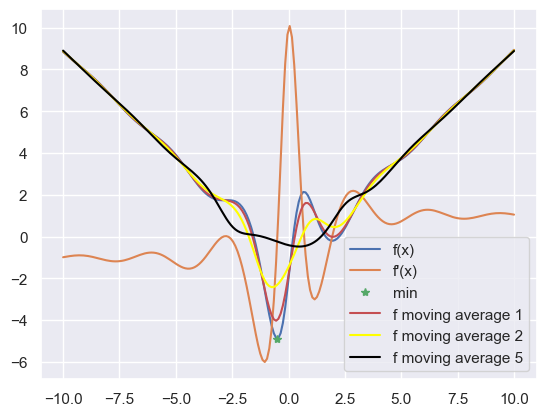

In [158]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from scipy.misc import derivative
from typing import Union, Callable


def mov_avg(func: Callable[[np.ndarray], np.ndarray], x: np.ndarray, window: float) -> np.ndarray:
    args = np.linspace(x - window / 2, x + window / 2, window * 100)
    return func(args).mean(axis=0)

def f(x: np.ndarray) -> np.ndarray:
    return (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)

def df(f: Callable[[np.ndarray], np.ndarray], x: np.ndarray) -> np.ndarray:
    return derivative(f, x, dx=1e-6)


x = np.linspace(-10, 10, 200)  # (-10, 10, 1000)
y = f(x) ## (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)
dy = df(f, x)

plt.plot(x, y, label='f(x)')
plt.plot(x, dy, label='f\'(x)')

min_f_p = scipy.optimize.fmin_bfgs(f, 0, full_output=True)
x_min, y_min = min_f_p[0][0], min_f_p[1]
plt.plot(x_min, y_min, '*', label='min ') 

m_a_1 = mov_avg(f, x, 1)
m_a_2 = mov_avg(f, x, 2)
m_a_5 = mov_avg(f, x, 5)

# print(m_a_1.shape, m_a_2.shape, m_a_5.shape)

plt.plot(x, m_a_1, label='f moving average 1') 
plt.plot(x, m_a_2, label='f moving average 2', color='yellow')  # x[:len(m_a_2)]
plt.plot(x, m_a_5, label='f moving average 5', color = 'black')  # x[(len(x) - len(m_a_5)) // 2 : len(x) // 2 + len(m_a_5) // 2]

plt.legend()
plt.show()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [ ]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1    
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[4, 0, 0, 0, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [ ]:
def sample_np(x: np.ndarray, c: int) -> np.ndarray:
    assert len(x) > 0
    return np.random.choice(np.arange(len(x)), size=c, p=x / np.sum(x))

sample_np(np.array([50, 3, 1, 7, 20]), 5)


array([0, 4, 0, 4, 0])

In [ ]:
def sample_np2(x: np.ndarray, c: int) -> np.ndarray:
    assert len(x) > 0
    
    s = np.sum(x)
    val = s * np.random.random(size=c)
    cur = np.cumsum(x)
    idx = np.searchsorted(cur, val)
    return idx

sample_np(np.array([50, 3, 1, 7, 20]), 5)

array([0, 3, 4, 4, 0])

Для проверки гипотезы однородности воспользуемся критерием Стьюдента. 

In [ ]:
# realize statistic tests
from scipy import stats

# from scipy.stats import ttest_ind
data1 = sample([50, 3, 1, 7, 20, 10, 13, 79, 100, 2], 10000)
data2 = list(sample_np([50, 3, 1, 7, 20, 10, 13, 79, 100, 2], 10000))  # TODO why list?
data3 = sample_np2([50, 3, 1, 7, 20, 10, 13, 79, 100, 2], 10000)
stat, p = stats.ttest_ind(data1, data2)
stat2, p2 = stats.ttest_ind(data1, data3)
print(stat, p)
print(stat2, p2)

-0.21226955438435882 0.8318989096674463
-0.1623768799007294 0.8710107169386714


$p-value > 0.05$, мы не попали в критическую область, значит, нет основания отвергнуть нулевую гипотезу при уровне значимости альфа=0.05. 

Для проверки гипотезы однородности воспользуемся Критерием Колмагорова-Смирнова

In [ ]:
from scipy.stats import ks_2samp

#perform Kolmagorov-Smirnov test
stat, p = ks_2samp(data1, data2)
stat2, p2 = ks_2samp(data1, data3)
print(stat, p)
print(stat2, p2)




0.016 0.15454104632436025
0.0126 0.40535690578815814


$p-value > 0.05$, мы не попали в критическую область, значит, нет основания отвергнуть нулевую гипотезу при уровне значимости альфа=0.05. 

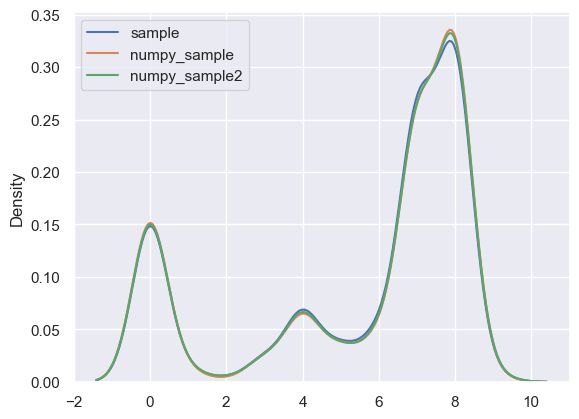

In [ ]:
sns.kdeplot(data=data1,  label='sample')
sns.kdeplot(data=data2,  label='numpy_sample')
sns.kdeplot(data=data3,  label='numpy_sample2')
plt.legend()
plt.show()

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [ ]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

2172

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

In [ ]:
import timeit 

In [ ]:
def walk_np(n: int) -> int:
    return np.sum(np.random.choice([-3, -1, 0, 2, 3], size=n))

walk_np(10_000)

2275

In [ ]:
print("Function walk: ", timeit.timeit('walk(10000)', globals=globals(), number=1000))
print("Function walk_np: ", timeit.timeit('walk_np(10000)', globals=globals(), number=1000))

Function walk:  4.43715145799797
Function walk_np:  0.16636750000179745


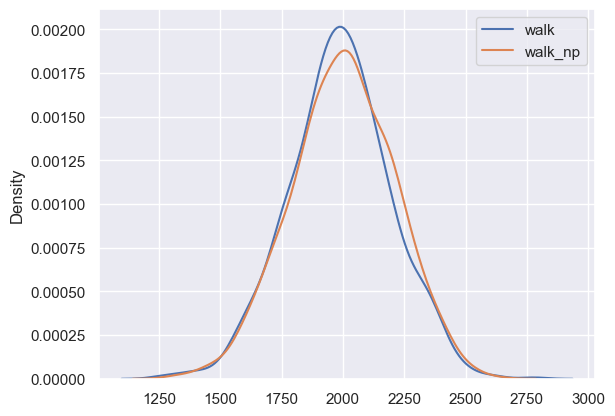

In [ ]:
walk_values = [walk(10000) for _ in range(1000)]
walk_np_values = [walk_np(10000) for _ in range(1000)]
sns.kdeplot(walk_values, label='walk')
sns.kdeplot(walk_np_values, label='walk_np')
plt.legend()
plt.show()


In [ ]:
%timeit walk(100000)

44 ms ± 479 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit walk_np(100000)

1.52 ms ± 6.37 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
4.45*1000/168, 44/1.52

(26.488095238095237, 28.94736842105263)

Производительность увеличилась в несколько (~26-29) раз. 

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [ ]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


1.1967797043071207

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [ ]:
from numba import njit

strange_conv_numba = njit(strange_conv)

a = np.random.random((10000, 10000))
strange_conv_numba(a)

0.6284409600939949

In [ ]:
import cython

In [ ]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [ ]:
%%cython

cimport numpy

def strange_conv_cython(numpy.ndarray['double', ndim=2] a):
    cdef int x = a.shape[0]
    cdef int y = a.shape[1]

    cdef double t = 1.
    cdef double c = 0.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


In [ ]:
%timeit strange_conv(a)

12.4 s ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit strange_conv_numba(a)

28.3 ms ± 76.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit strange_conv_cython(a)

42.3 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Производительность с помощью Numba улучшается в ~438 раз, производительность с Cython больше в 293 раз

In [ ]:
print(12.4*1000/28.3,12.4*1000/42.3)

438.1625441696113 293.1442080378251
